# Jupiter XIIe Lustrum - Text Analytics

# Inleiding

Verloop van brief, mail, whatsapp 

In 2009 x mails
Nu x

2 whatsapp groepen: Jupiter, Members 

Oude manier van varia en de nieuwe Data-driven. 

Wat kunnen we leren over Dispuut Jupiter door middel van het toepassen van text analytics pp whatsapp gesprekshistoriey. 

## Data collectie 
2013
25k berichten 
X mensen 

## Data exploratie 
Aantal pp histogram 
Dagen en uren week plus interpretatie 
Message lengte gemiddeld 
Word cloud pp. 

emoticon sukkel

media koning, voorbeeldplaatje max

## Modeling (wellicht)
Clustering voor types berichten. 

## Conclusie 
Turbulente tijd, eerst waren varia dat wat jij wilde was, nu wat de data zegt. Dat kan wellicht onprettige feiten blootleggen, of minder spannend zijn dan je dacht. Maar met een beter inzicht in het ware communicatie gedrag kunnen we betere chat keuzes maken in de toekomst. 

Heel bewust met data berichten schrijven 
Heel bewust met data betekenis simuleren 
Het Jupiter Data Science Genootschap

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

import pandas as pd
import datetime as dt

import nltk
from nltk.probability import FreqDist

import sys
import codecs
import nltk
from nltk.corpus import stopwords

import random
import matplotlib as mpl

from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS


In [67]:
# Import data Simon since 2013: Praatgroep Jupiter
df = pd.read_table('./data_2013.txt', names=["all"])

# Extract date from messages with regex
df['date'] = df['all'].str.extract("(\d{1,2}/\d{1,2}/\d{2}, \d{2}:\d{2})", expand=True)
# Parse date as datetime. format: 3/25/13, 14:20
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y, %H:%M')
df['name'] = df['all'].str.extract("(\d{1,2}/\d{1,2}/\d{2}, \d{2}:\d{2})( -.*?:)(.*)", expand=True)[1].str[3:-1]
df['message'] = df['all'].str.extract("(\d{1,2}/\d{1,2}/\d{2}, \d{2}:\d{2})( -.*?:)(.*)", expand=True)[2].str.lower()

# Import data Max since 2014: Jupiter
df1 = pd.read_table('./data_2014.txt', names=["all"])

# Extract date from messages with regex -> different format!!
df1['date'] = df1['all'].str.extract("(\d{1,2}-\d{1,2}-\d{2}, \d{1,2}:\d{2} \w.\w.)", expand=True)
df1['date'] = pd.to_datetime(df1['date'].str.upper().str.replace(".", ""), format='%d-%m-%y, %I:%M %p')
# Extract name and message
df1['name'] = df1['all'].str.extract("(\d{1,2}-\d{1,2}-\d{2}, \d{1,2}:\d{2} \w.\w.)( -.*?:)(.*)", expand=True)[1].str[3:-1]
df1['message'] = df1['all'].str.extract("(\d{1,2}-\d{1,2}-\d{2}, \d{1,2}:\d{2} \w.\w.)( -.*?:)(.*)", expand=True)[2].str.lower()

# Merge datasets
df = pd.concat([df, df1])

#df = df.drop('all', 1)

# Include weekday name and hour of day
df['weekday'] = df['date'].dt.weekday_name
df['dayhour'] = df['date'].dt.hour

# Drop missing data 
df = df.dropna()

#Tokenize words
df["tokenized_mess"] = df["message"].apply(nltk.word_tokenize)
df['mess_length'] = df.apply(lambda row: len(row['tokenized_mess']), axis=1)

# Set datatypes
df[['mess_length', 'dayhour']] = df[['mess_length', 'dayhour']].astype(int)
df['weekday'] = df['weekday'].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44026 entries, 19 to 20268
Data columns (total 8 columns):
all               44026 non-null object
date              44026 non-null datetime64[ns]
name              44026 non-null object
message           44026 non-null object
weekday           44026 non-null category
dayhour           44026 non-null int64
tokenized_mess    44026 non-null object
mess_length       44026 non-null int64
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB


In [87]:
df[df['message'].str.contains("weggelaten")]


,all,date,name,message,weekday,dayhour,tokenized_mess,mess_length,emo_cnt,rups_cnt,loser_cnt,sukkel_cnt,link_cnt,media_cnt
63,"08-09-14, 11:01 p.m. - Sem Quaedvlieg: <Media ...",2014-09-08 23:01:00,Sem Quaedvlieg,<media weggelaten>,Monday,23,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
103,"12-09-14, 1:53 p.m. - Joost van Thiel: <Media ...",2014-09-12 13:53:00,Joost van Thiel,<media weggelaten>,Friday,13,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
182,"17-09-14, 12:35 p.m. - Joost van Thiel: <Media...",2014-09-17 12:35:00,Joost van Thiel,<media weggelaten>,Wednesday,12,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
209,"18-09-14, 12:50 p.m. - Joost Vrijhoef: <Media ...",2014-09-18 12:50:00,Joost Vrijhoef,<media weggelaten>,Thursday,12,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
215,"19-09-14, 3:06 p.m. - Jaap Peterse: <Media weg...",2014-09-19 15:06:00,Jaap Peterse,<media weggelaten>,Friday,15,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
239,"24-09-14, 6:13 p.m. - Simon Riezebos: <Media w...",2014-09-24 18:13:00,Simon Riezebos,<media weggelaten>,Wednesday,18,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
242,"24-09-14, 7:48 p.m. - Sem Quaedvlieg: <Media w...",2014-09-24 19:48:00,Sem Quaedvlieg,<media weggelaten>,Wednesday,19,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
244,"24-09-14, 7:51 p.m. - Joost Vrijhoef: <Media w...",2014-09-24 19:51:00,Joost Vrijhoef,<media weggelaten>,Wednesday,19,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
245,"24-09-14, 7:51 p.m. - Joost Vrijhoef: <Media w...",2014-09-24 19:51:00,Joost Vrijhoef,<media weggelaten>,Wednesday,19,"[<, media, weggelaten, >]",4,0,0,0,0,0,0
302,"26-09-14, 4:05 a.m. - Lester: <Media weggelaten>",2014-09-26 04:05:00,Lester,<media weggelaten>,Friday,4,"[<, media, weggelaten, >]",4,0,0,0,0,0,0


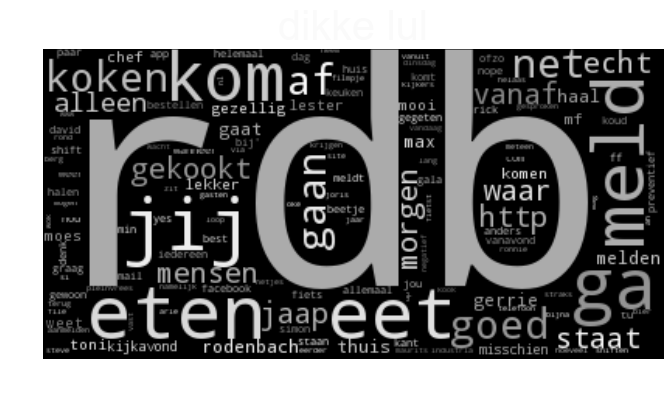

In [54]:
name_wordcloud(df[(df['weekday'] == 'Monday') &(df['dayhour'].isin([15, 16]))], 'all', verneuk='')

In [60]:
df[(df['name']=='Joost Vrijhoef')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 38 to 4940
Data columns (total 13 columns):
all               419 non-null object
date              419 non-null datetime64[ns]
name              419 non-null object
message           419 non-null object
weekday           419 non-null category
dayhour           419 non-null int64
tokenized_mess    419 non-null object
mess_length       419 non-null int64
emo_cnt           419 non-null int64
rups_cnt          419 non-null int64
loser_cnt         419 non-null int64
sukkel_cnt        419 non-null int64
link_cnt          419 non-null int64
dtypes: category(1), datetime64[ns](1), int64(7), object(4)
memory usage: 43.0+ KB


In [62]:
import qgrid

# Just run the below command once
# qgrid.nbinstall(overwrite=True) 

#qgrid.show_grid(df[(df['name']=='Joost Vrijhoef')].head(1000))
qgrid.show_grid(df[(df['name']=='Maurits Gernaat')].head(1000))

In [70]:
df['emo_cnt'] = df['message'].str.encode('utf-8').str.count(b"(\xf0\x9f)")
df['rups_cnt'] = df['message'].str.encode('utf-8').str.count(b"(\xf0\x9f\x90\x9b)")
df['loser_cnt'] = df['message'].str.encode('utf-8').str.count(b"(\xf0\x9f\x98\x9c)")
df['sukkel_cnt'] = df['message'].str.encode('utf-8').str.count(b"(sukkel)")
df['link_cnt'] = df['message'].str.encode('utf-8').str.count(b"(dumpert)")

In [71]:
def nr_message_plot(df, groupby_col):
    df.groupby(groupby_col).size().\
    sort_values(ascending=False).plot.bar(alpha=0.5, title="Aantal berichten per persoon")
    
def total_emo_cnt(df, col, title):
    df.groupby('name')[col].sum().\
    sort_values(ascending=False).plot.bar(alpha=0.5, title=title)

def name_nr_message_plot(df, name, groupby_col):
    df[df['name'] == name].groupby(groupby_col).size().\
    sort_values(ascending=False).plot.bar(alpha=0.5, title="Nr. of messages %s" % name)

def message_length_plot(df):
    df.groupby('name')['mess_length'].mean().sort_values(ascending=False).\
    plot.bar(alpha=0.5, title="Average message length")
    
def name_message_length_plot(df, name, groupby_col):
    df[df['name'] == name].groupby('dayhour')['mess_length'].mean().\
    sort_values(ascending=False).plot.bar(alpha=0.5, title="Average message length %s" % name)    

In [93]:
def name_wordcloud(df, name, verneuk):
    # Join the messages per name 
    if name == 'all':
        dfn = df.groupby(['name'])['message'].apply(lambda x: ','.join(x)).reset_index()
        text = str(dfn['message'].values)
    else:
        dfn = df.groupby(['name'])['message'].apply(lambda x: ','.join(x)).reset_index()
        text = str(dfn.loc[(dfn['name'] == name),'message'].values).lower()
    
    # Verneuk-parameter 
    text = text + (verneuk + ', ')*40
    
    # NLTK's default Dutch stopwords
    default_stopwords = set(nltk.corpus.stopwords.words('dutch'))

    # We're adding some on our own - could be done inline like this...
    custom_stopwords = set((u'omitted', u'weggelaten', u'media', u'wel', u'even', u'we', u'haha', \
                           u'mee', u'lunch', u'half', u'hoe', u'laat', u'jullie', u'prima'))
    # ... but let's read them from a file instead (one stopword per line, UTF-8)
    #stopwords_file = './stopwords.txt'
    #custom_stopwords = set(codecs.open(stopwords_file, 'r', 'utf-8').read().splitlines())

    all_stopwords = default_stopwords | custom_stopwords

    words = nltk.tokenize.word_tokenize(text)

    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]

    # Remove numbers
    words = [word for word in words if not word.isnumeric()]

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]

    # Stemming words seems to make matters worse, disabled
    # stemmer = nltk.stem.snowball.SnowballStemmer('german')
    # words = [stemmer.stem(word) for word in words]

    # Remove stopwords
    words = [word for word in words if word not in all_stopwords]

    # Calculate frequency distribution
    fdist = nltk.FreqDist(words)

    # Output top 50 words
    #     for word, frequency in fdist.most_common(50):
    #         print(u'{};{}'.format(word, frequency))
    
    # Initialize wordcloud parameters
    limit = 1000
    bgcolor = '#000000'
    fontcolor='#fafafa'
    
    # Generate wordcloud
    wordcloud = WordCloud(
    max_words=limit,
    stopwords=all_stopwords,
    background_color=bgcolor
    ).generate(text)
    
    # Plot wordcloud
    fig = plt.figure()
    fig.set_figwidth(8)
    fig.set_figheight(6)

    plt.imshow(wordcloud.recolor(color_func=grey_color,  random_state=3))

    plt.title("dikke lul", color=fontcolor, size=30, y=1.01)
    plt.axis('off')
    plt.show()

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

In [74]:
len(df['name'].unique())
#df.info()
df['name'].unique()

array(['Job Visser', 'Maarten Simon', 'Tom Klyn', 'Timo van Dooremaal',
       'Luc Jacobs', 'Frank Rutgers', 'David Belgers', 'Thomas Janssens',
       'Joost Vrijhoef', 'David Chef Berenstein',
       'Grote vriendelijke reus', 'Joost Gerrie van Thiel',
       'Werner Hofmeester', 'Joris Schalks', 'Koen Harthoorn',
       'Max Konings', 'Arjen Franken', 'Rick van Nobelen', 'Max Moes Osse',
       'Jaap Peterse', '\u202a+31 6 21955233\u202c', 'Lester Mateboer',
       'Chris Swinkels', '\u202a+31 6 46303872\u202c', 'Bas van der Werf',
       'Maurits Gernaat', '\u202a+31 6 14846409\u202c',
       'Lex Willy van Saane', 'Job Stiev van Geest', 'Koen Adje Hendrikse',
       'Lars ter Braak', '\u202a+31 6 14200303\u202c',
       '\u202a+31 6 14829561\u202c', '\u202a+31 6 52187656\u202c',
       'Simon Riezebos', 'Joris', 'Joost van Thiel', 'Sem Quaedvlieg',
       'Lester', 'David Berenstein', 'Max Osse', 'Rick Van Nobelen',
       'Joris Marcelis', 'Bas van de Werf (Jupiter )',
       'J

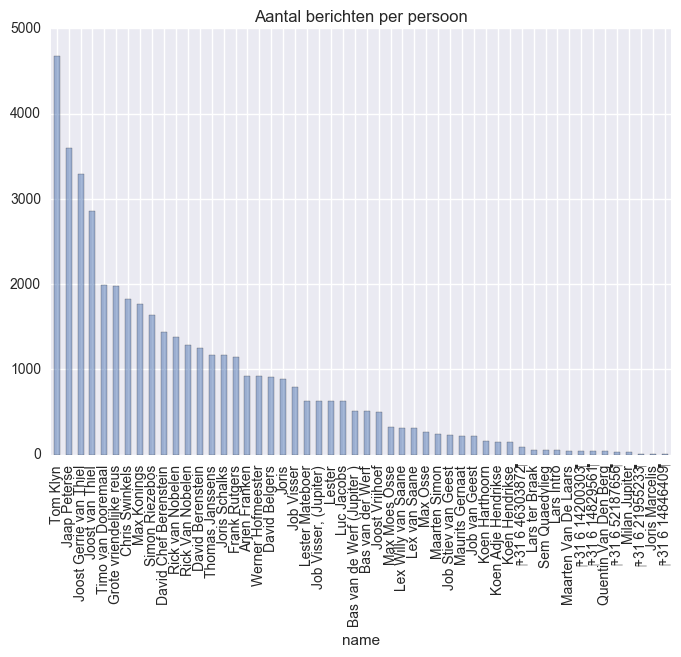

In [75]:
nr_message_plot(df, 'name')

In [43]:
df[df['weekday']]

KeyError: "['Monday' 'Monday' 'Monday' ..., 'Saturday' 'Sunday' 'Sunday'] not in index"

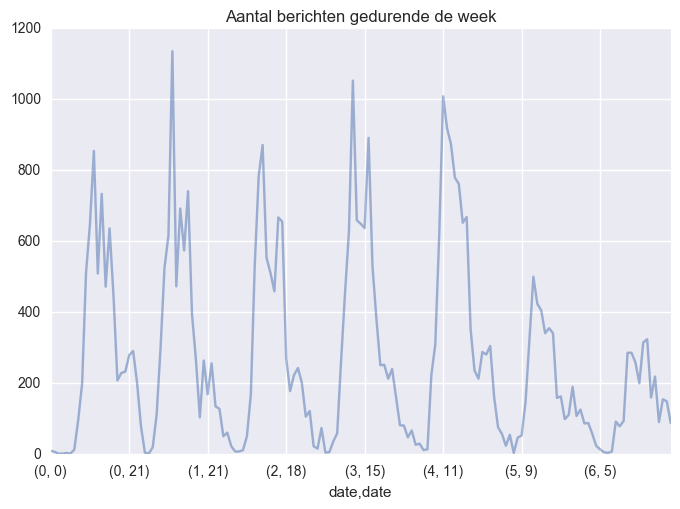

In [76]:
df.groupby([df.date.dt.weekday, df.date.dt.hour])['message'].count().\
    plot.line(alpha=0.5, title="Aantal berichten gedurende de week" )

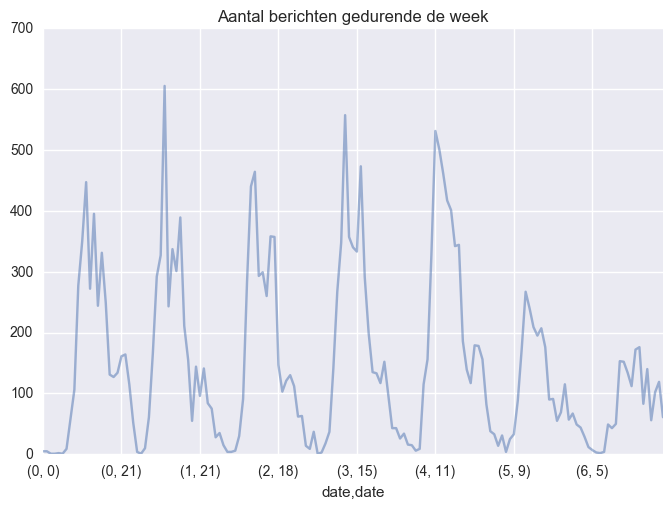

In [34]:
df.groupby([df.date.dt.weekday, df.date.dt.hour])['message'].count().\
    plot.line(alpha=0.5, title="Aantal berichten gedurende de week" )

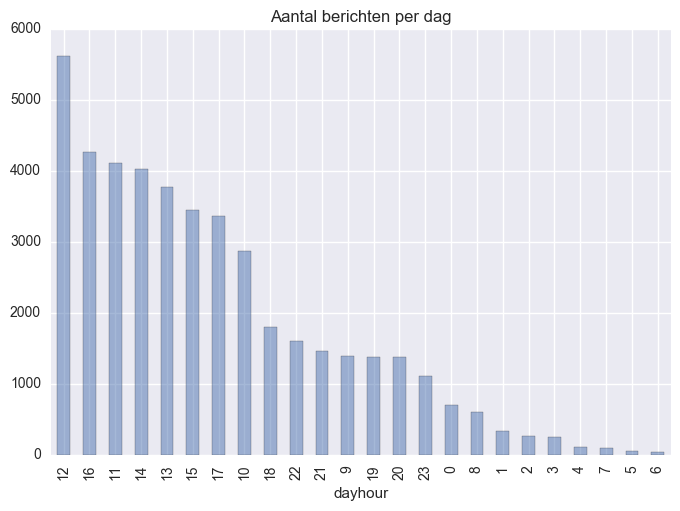

In [77]:
df.groupby(['dayhour'])['message'].count().\
    sort_values(ascending=False).plot.bar(alpha=0.5, title="Aantal berichten per dag" )

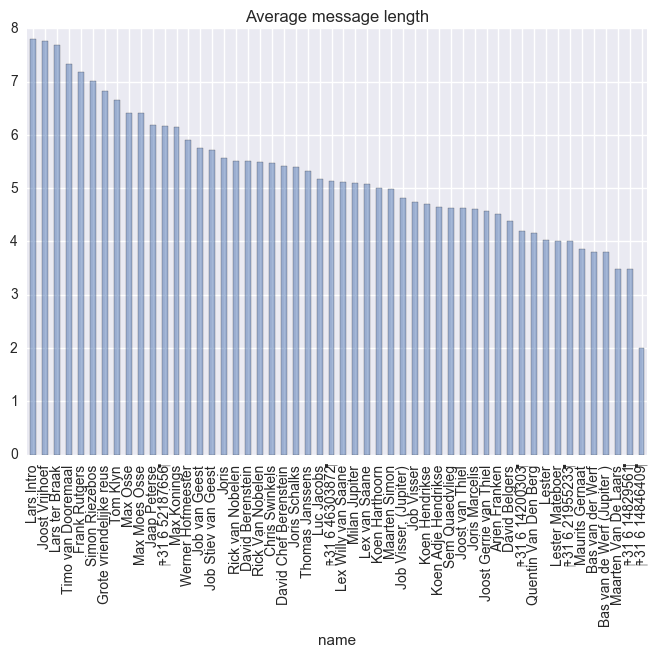

In [78]:
message_length_plot(df)

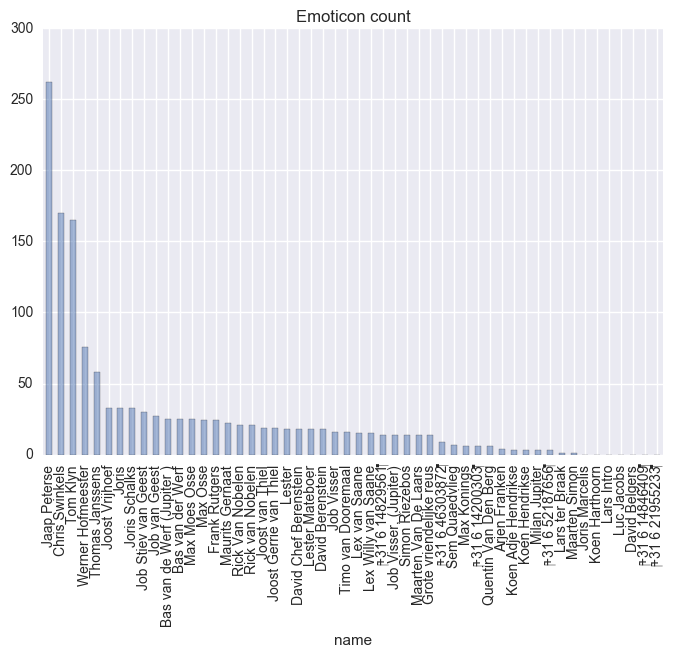

In [80]:
total_emo_cnt(df, 'emo_cnt', title = "Emoticon count")

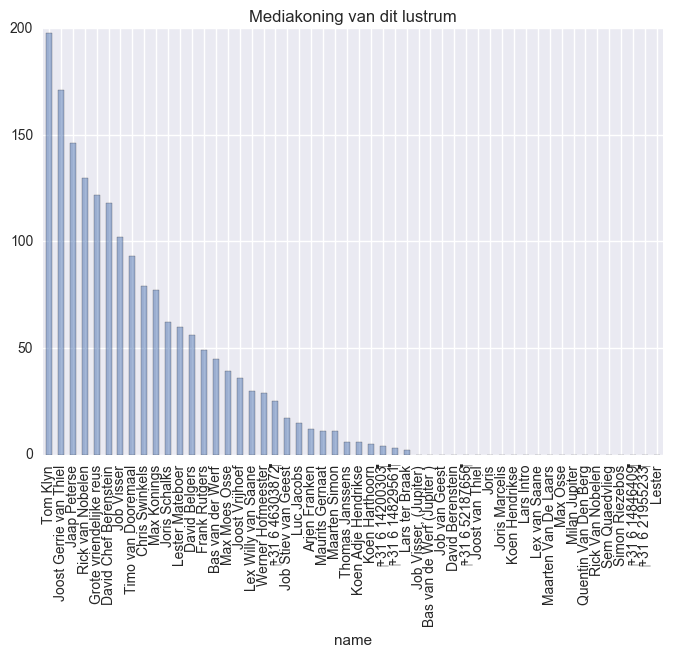

In [81]:
df['media_cnt'] = df['message'].str.count("<media omitted>")
df.groupby('name')['media_cnt'].sum().sort_values(ascending=False).plot.bar(alpha=0.5, title="Mediakoning van dit lustrum")


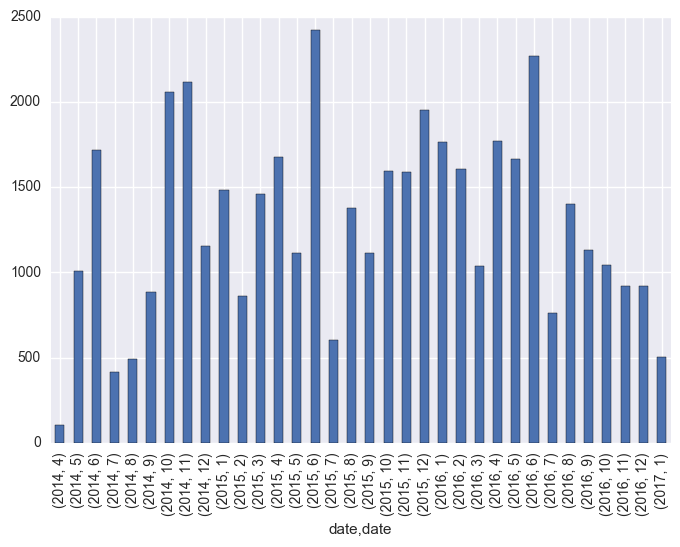

In [82]:
df['message'].groupby([df.date.dt.year, df.date.dt.month]).count().plot(kind="bar")


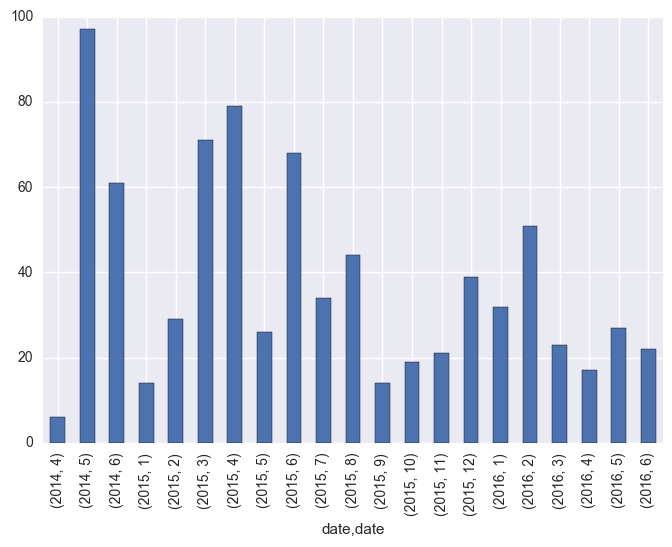

In [69]:
df[df['name'] == 'Job Visser']['message'].groupby([df.date.dt.year, df.date.dt.month]).count().plot(kind="bar")


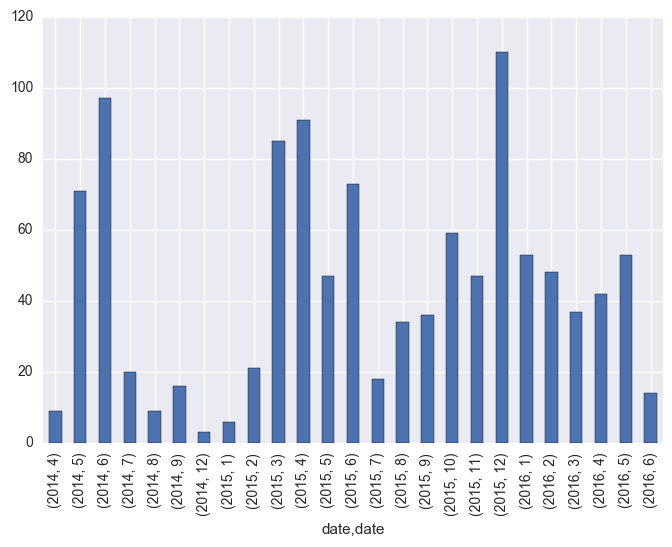

In [71]:
df[df['name'] == 'Timo van Dooremaal']['message'].groupby([df.date.dt.year, df.date.dt.month]).count().plot(kind="bar")


In [262]:
s = "ik vind 😍  😘 matig erg, maar 😂   😜 heel kut en 👍🏽 mag of 💩, rups 🐛 "
s.encode('utf-8')

b'ik vind \xf0\x9f\x98\x8d  \xf0\x9f\x98\x98 matig erg, maar \xf0\x9f\x98\x82   \xf0\x9f\x98\x9c heel kut en \xf0\x9f\x91\x8d\xf0\x9f\x8f\xbd mag of \xf0\x9f\x92\xa9, rups \xf0\x9f\x90\x9b '

In [23]:
df.groupby('name')['loser_cnt'].sum().sort_values(ascending=False)

name
Joris Schalks              3
Max Moes Osse              2
Joost Gerrie van Thiel     1
‪+31 6 52187656‬           0
Job Stiev van Geest        0
Koen Adje Hendrikse        0
Joost Vrijhoef             0
Job Visser                 0
Jaap Peterse               0
Lars ter Braak             0
Grote vriendelijke reus    0
Frank Rutgers              0
David Chef Berenstein      0
David Belgers              0
Chris Swinkels             0
Bas van der Werf           0
Koen Harthoorn             0
Lester Mateboer            0
‪+31 6 46303872‬           0
Lex Willy van Saane        0
Luc Jacobs                 0
Maarten Simon              0
Maurits Gernaat            0
Max Konings                0
Rick van Nobelen           0
Thomas Janssens            0
Timo van Dooremaal         0
Tom Klyn                   0
Werner Hofmeester          0
‪+31 6 14200303‬           0
‪+31 6 14829561‬           0
‪+31 6 14846409‬           0
‪+31 6 21955233‬           0
Arjen Franken              0
Name: los

In [30]:
df[(df['link_cnt'] > 0)]
#df[(df['link_cnt'] > 0) & (df['name'] == 'David Chef Berenstein ')]

,all,date,name,message,weekday,dayhour,tokenized_mess,mess_length,emo_cnt,rups_cnt,loser_cnt,sukkel_cnt,link_cnt
3765,"8/25/14, 21:19 - ‪+31 6 46303872‬: Als iemand ...",2014-08-25 21:19:00,‪+31 6 46303872‬,als iemand de link van het hele filmpje wil: ...,Monday,21,"[als, iemand, de, link, van, het, hele, filmpj...",13,0,0,0,0,1
7967,"2/16/15, 11:08 - Max Konings: Is dit dreas op ...",2015-02-16 11:08:00,Max Konings,is dit dreas op dumpert?,Monday,11,"[is, dit, dreas, op, dumpert, ?]",6,0,0,0,0,1
7968,"2/16/15, 11:10 - Frank Rutgers: http://www.dum...",2015-02-16 11:10:00,Frank Rutgers,http://www.dumpert.nl/mediabase/6639977/705cf...,Monday,11,"[http, :, //www.dumpert.nl/mediabase/6639977/7...",3,0,0,0,0,1
8885,"3/31/15, 17:30 - Rick van Nobelen: Dumpert: Pe...",2015-03-31 17:30:00,Rick van Nobelen,dumpert: pech voor de vrouwenboot... - http:/...,Tuesday,17,"[dumpert, :, pech, voor, de, vrouwenboot, ...,...",13,0,0,0,0,2
13085,"10/1/15, 15:31 - Rick van Nobelen: http://www....",2015-10-01 15:31:00,Rick van Nobelen,http://www.dumpert.nl/mediabase/6685908/0ea40...,Thursday,15,"[http, :, //www.dumpert.nl/mediabase/6685908/0...",3,0,0,0,0,1
13563,"10/23/15, 13:16 - Joost Gerrie van Thiel: Mooi...",2015-10-23 13:16:00,Joost Gerrie van Thiel,mooi op dumpert knallem,Friday,13,"[mooi, op, dumpert, knallem]",4,0,0,0,0,1
20445,"6/21/16, 16:35 - Max Konings: Je bent alleen m...",2016-06-21 16:35:00,Max Konings,je bent alleen maar dumpert filmpjes aan het ...,Tuesday,16,"[je, bent, alleen, maar, dumpert, filmpjes, aa...",9,0,0,0,0,1
20754,"6/30/16, 12:28 - Chris Swinkels: http://www.du...",2016-06-30 12:28:00,Chris Swinkels,http://www.dumpert.nl/mediabase/6821769/4c80c...,Thursday,12,"[http, :, //www.dumpert.nl/mediabase/6821769/4...",3,0,0,0,0,1


In [124]:
df.groupby('name').size().\
    sort_values(ascending=False)[2]

1356

In [21]:
total_emo_cnt(df, '')

TypeError: total_emo_cnt() missing 2 required positional arguments: 'col' and 'title'

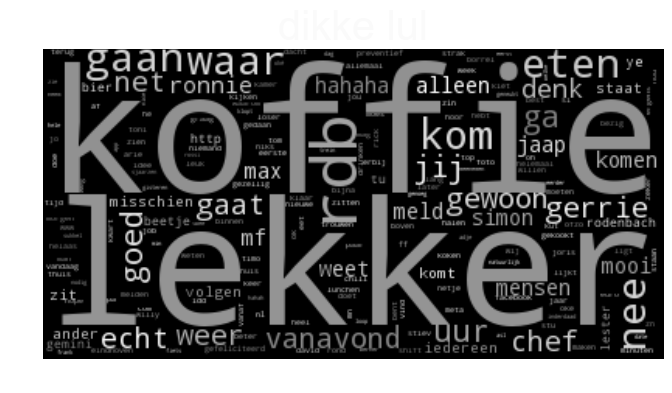

In [94]:
name_wordcloud(df, 'all', verneuk="")

In [33]:
df['name'].unique()

names = ['Job Visser', 'Tom Klyn', 'Timo van Dooremaal',
       'Luc Jacobs', 'Frank Rutgers', 'David Belgers', 'Thomas Janssens',
       'Joost Vrijhoef', 'David Chef Berenstein',
       'Grote vriendelijke reus', 'Joost Gerrie van Thiel',
       'Werner Hofmeester', 'Joris Schalks',
       'Max Konings', 'Arjen Franken', 'Max Moes Osse', 'Rick van Nobelen',
       'Jaap Peterse', 'Lester Mateboer', 'Chris Swinkels']

name_x = names[:5]  
# Create groups per year

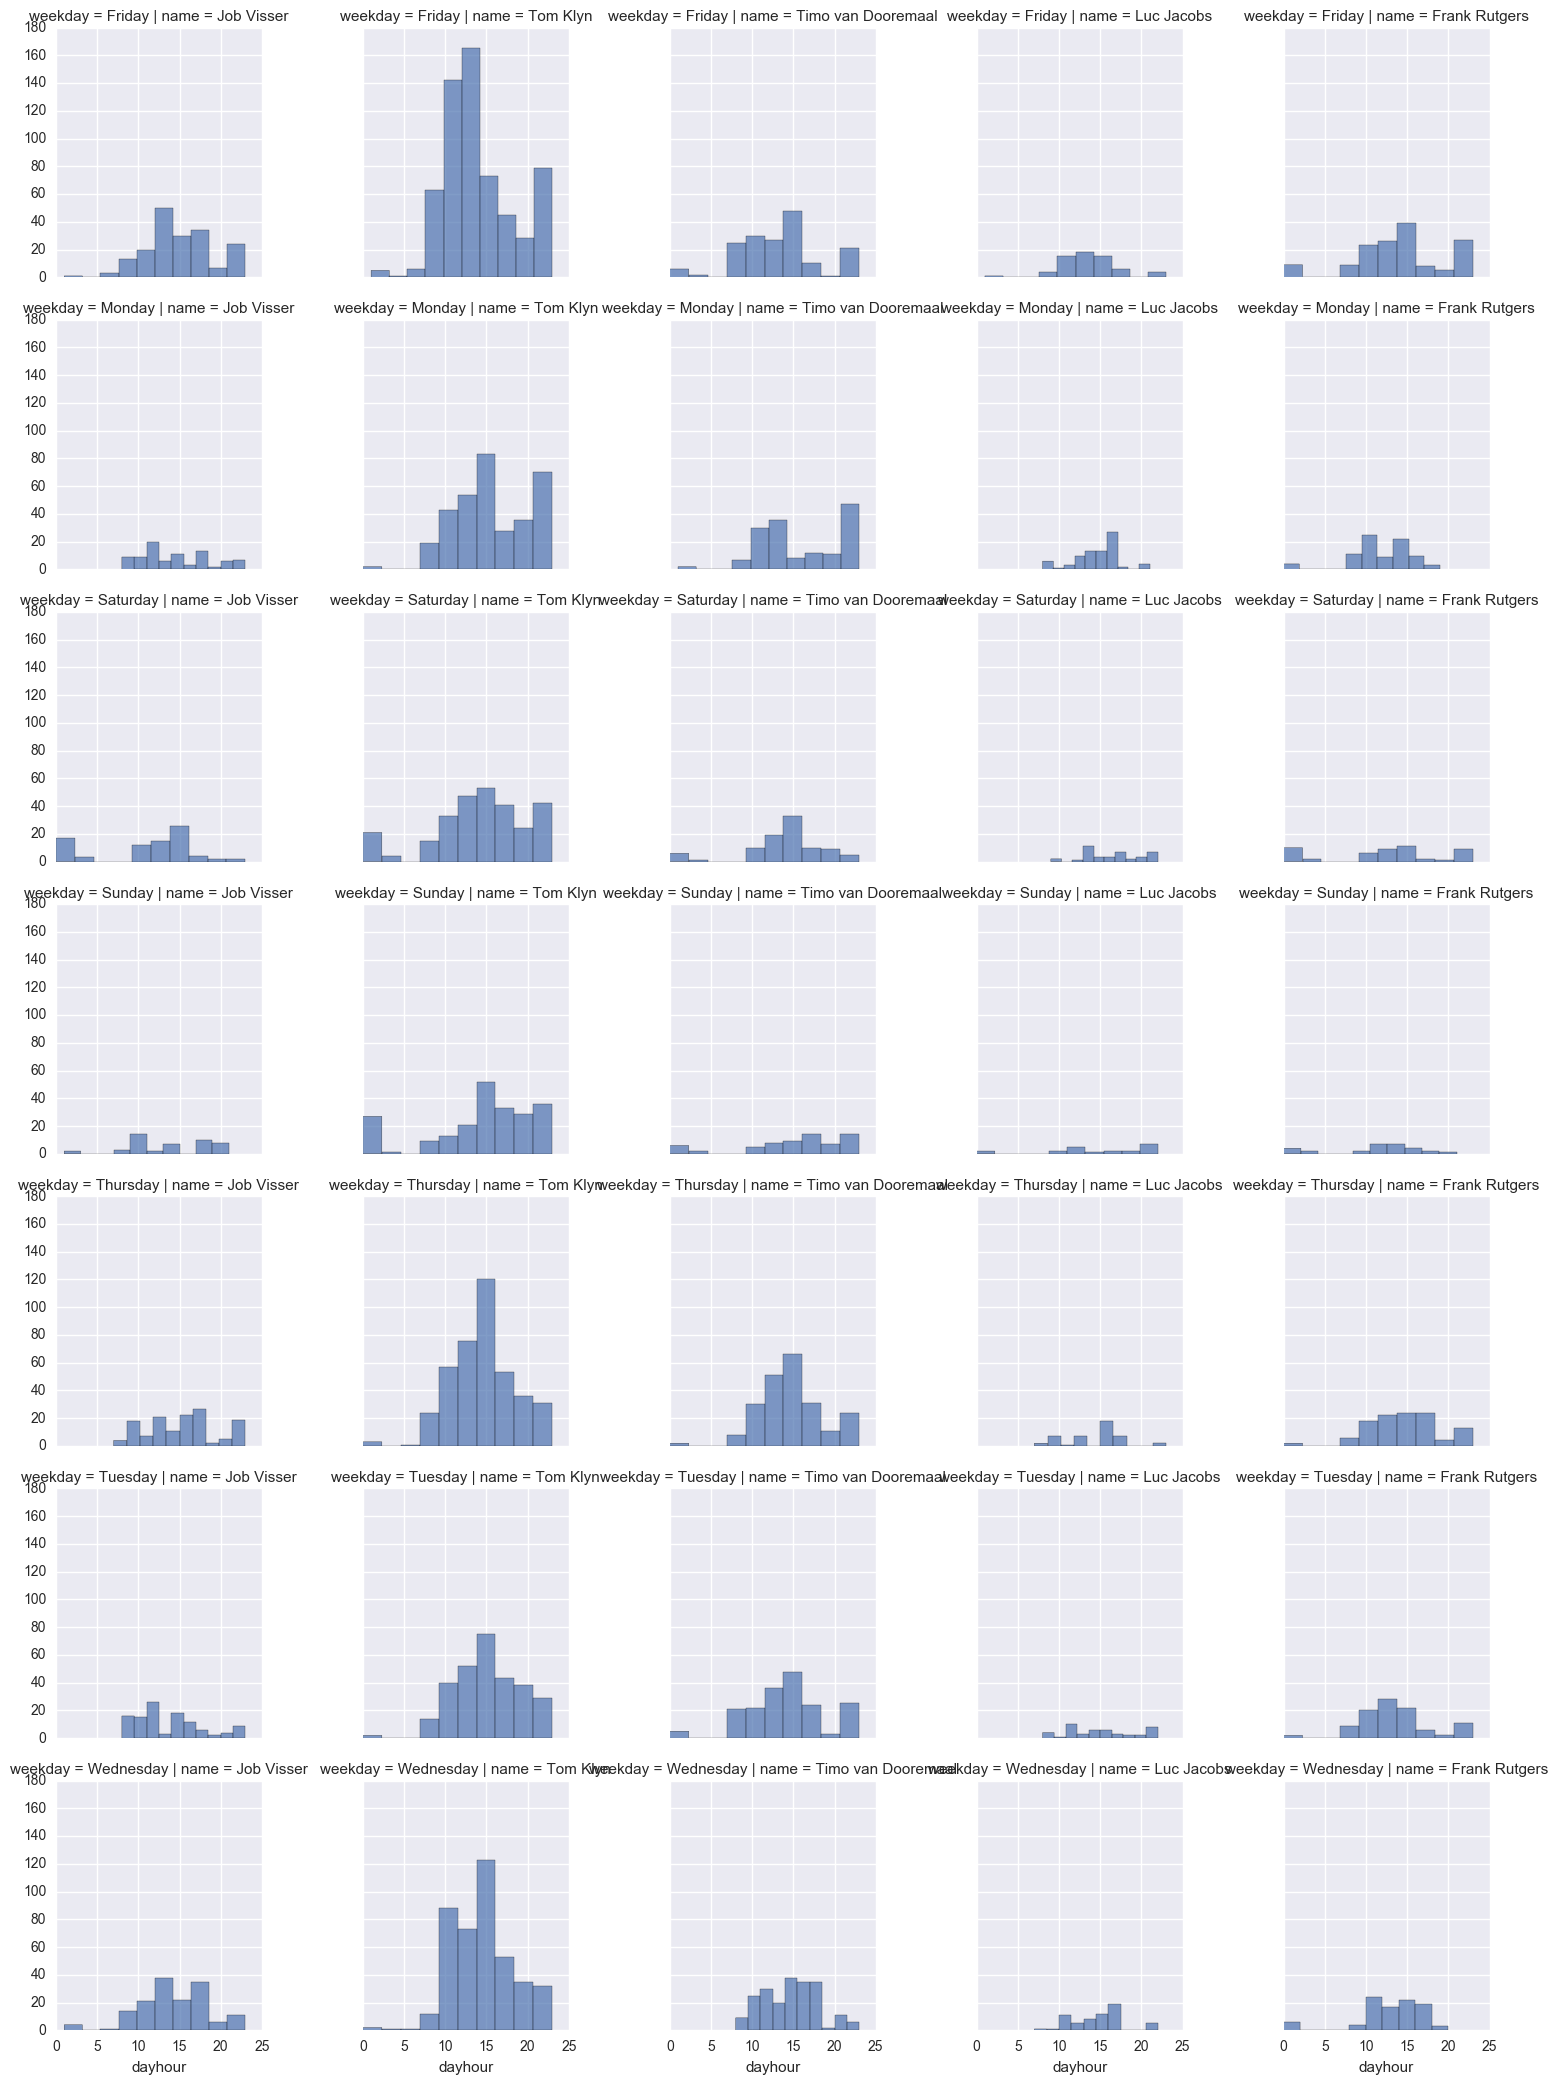

In [34]:
g = sns.FacetGrid(df[df['name'].isin(names[:5])], row="weekday", col="name")
g.map(plt.hist , "dayhour", alpha=.7)
g.add_legend();

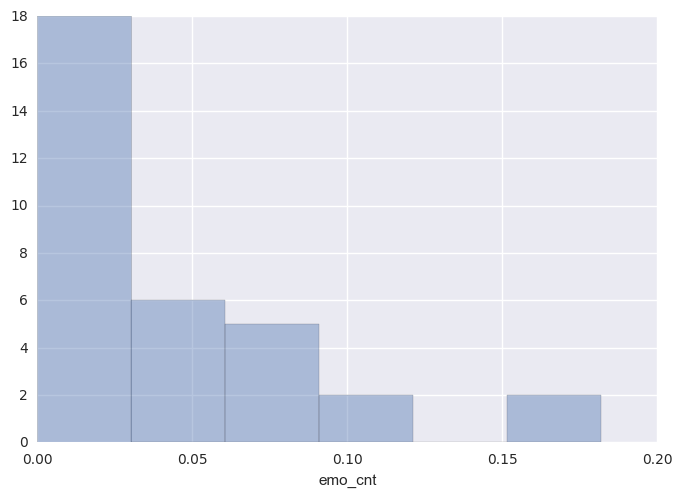

In [244]:
sns.set(color_codes=True)

sns.distplot(df.groupby('name').mean()["emo_cnt"], kde=False, rug=False);

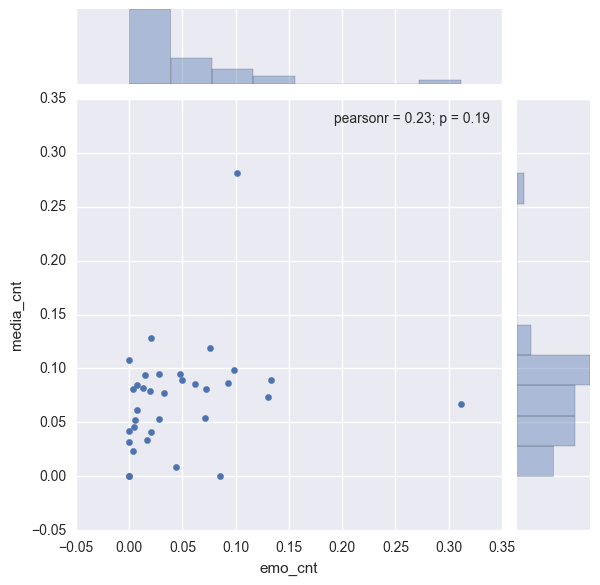

In [35]:
sns.jointplot("emo_cnt", "media_cnt", data=df.groupby('name').mean());


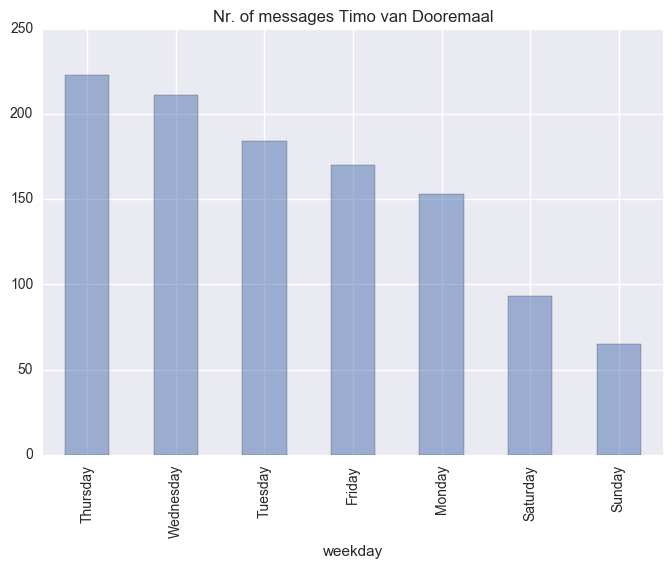

In [36]:
name_nr_message_plot(df, 'Timo van Dooremaal', 'weekday')